In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

# output_dir = "/mnt/ssdwdc/chemotherapy_strage/result_10_valwsi_LEV0/test/"
output_dir = "/mnt/ssdwdc/chemotherapy_strage/result_10_valwsi_LEV1/test/"

fold = "all"
project = f"{fold}_resnet50_Adam_batch32_shape[256, 256]"
# classes = [0, 1, 2]
classes = ["Non-Neop.", "Tumor bed", "Residual tumor"]
save = True
dpi = 300

cm_cv0 = np.array(
    [[39383, 4207,   55],
    [ 9636,22666, 1678],
    [  218,  468, 2437]]
)

cm_cv1 = np.array(
    [[45027, 2654,  723],
    [ 4001,10526, 2634],
    [   63,  162, 1990]]
)

cm_cv2 = np.array(
    [[42201, 4102,  118],
    [ 5302,15446,  120],
    [  271,  827, 4723]]
)

cm = cm_cv0 + cm_cv1 + cm_cv2

In [2]:
def plot_confusion_matrix(cm, class_names, normalize=True):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.

    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    https://towardsdatascience.com/exploring-confusion-matrix-evolution-on-tensorboard-e66b39f4ac12
    """

    figure = plt.figure(figsize=(8, 8))
    plt.rcParams["font.size"] = 20

    # Normalize the confusion matrix.
    if normalize:
        cm = np.around(cm.astype("float") / cm.sum(axis=1)[:, np.newaxis], decimals=2)
        plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues, vmin=0, vmax=1)
    else:
        plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)

    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    return figure


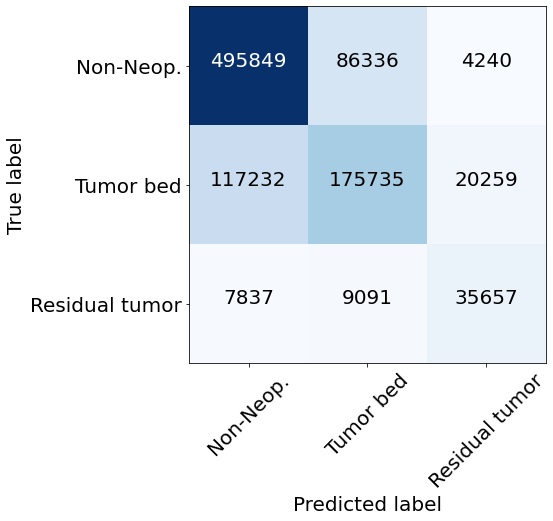

In [3]:
# Not-Normalized
cm_plt = plot_confusion_matrix(
    cm, classes, normalize=False)
if save:
    cm_plt.savefig(
        output_dir
        + project
        + "_"
        + fold
        + "_nn-confmatrix.png",
        dpi=dpi
    )
# plt.clf()
# plt.close()

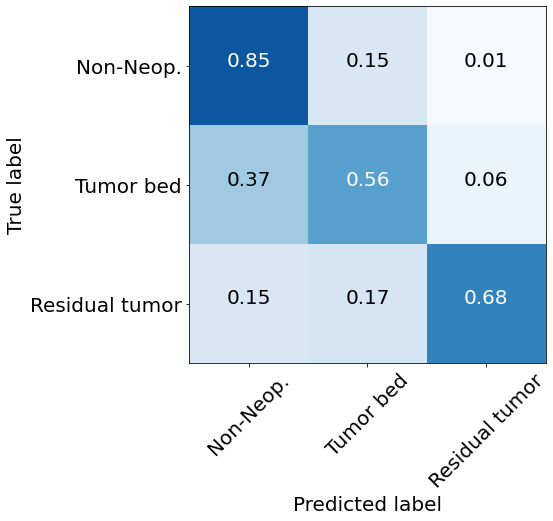

In [4]:
# Normalized
cm_plt = plot_confusion_matrix(
    cm, classes, normalize=True)
if save:
    cm_plt.savefig(
        output_dir
        + project
        + "_"
        + fold
        + "_confmatrix.png",
        dpi=dpi
    )
# plt.clf()
# plt.close()